In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys
import localSettings as ls
import math
print(ls.main_path)
import load_data_run123
import plotter_alex
import importlib
importlib.reload(plotter_alex)
import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb
import nue_booster 
importlib.reload(nue_booster)
import awkward
from matplotlib import gridspec
from collections import defaultdict

/home/alex/NuMI/PELEE/


##  Energy

## Closure Tests

In [12]:
##5GEV

with open('../stv-analysis-new/nue_unsmeared_events_energy_MC_ONLY_weighted_recoCut_incErr_07Jul.csv') as file:
    content = file.readlines()
events_nue = content[0:]
    
for i in range(10):
    events_nue[i]=events_nue[i].rstrip().rstrip(',')
    events_nue[i] = float(events_nue[i])
    
print("Unsmeared events")
print(events_nue)
print("")

#------------------------------------------------------------------------------
with open('../stv-analysis-new/nue_unsmeared_AC_energy_MC_ONLY_weighted_recoCut_incErr_07Jul.csv') as file:
    content = file.readlines()
AC_nue = content[0:]
    
for i in range(100):
    AC_nue[i]=AC_nue[i].rstrip().rstrip(',')
    AC_nue[i] = float(AC_nue[i])
    

chunks_nue = [AC_nue[x:x+10] for x in range(0, len(AC_nue), 10)]

print("AC")
print(chunks_nue)
print("")
#---------------------------------------------------------------

with open('nue_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_recoCut_07Jul.csv') as file:
    content = file.readlines()
prior_true_nue = content[0:]
    
for i in range(10):
    prior_true_nue[i]=prior_true_nue[i].rstrip().rstrip(',')
    prior_true_nue[i] = float(prior_true_nue[i])
    
print("Prior Truth: ")
print(prior_true_nue)
print("")

#----------------------------------------------------------------
with open('../stv-analysis-new/nue_unsmeared_errors_energy_MC_ONLY_weighted_recoCut_incErr_07Jul.csv') as file:
    content = file.readlines()
errs_nue = content[0:]
    
for i in range(10):
    errs_nue[i]=errs_nue[i].rstrip().rstrip(',')
    errs_nue[i] = float(errs_nue[i])
    
print("Errors: ")
print(errs_nue)
print("")
print("################################################################")
print("")

#----------------------------------------------------------------

with open('../stv-analysis-new/numu_unsmeared_events_energy_MC_ONLY_weighted_recoCut_incErr_07Jul.csv') as file:
    content = file.readlines()
events_numu = content[0:]
    
for i in range(10):
    events_numu[i]=events_numu[i].rstrip().rstrip(',')
    events_numu[i] = float(events_numu[i])
    
print("Unsmeared events")
print(events_numu)
print("")

#------------------------------------------------------------------------------
with open('../stv-analysis-new/numu_unsmeared_AC_energy_MC_ONLY_weighted_recoCut_incErr_07Jul.csv') as file:
    content = file.readlines()
AC_numu = content[0:]
    
for i in range(100):
    AC_numu[i]=AC_numu[i].rstrip().rstrip(',')
    AC_numu[i] = float(AC_numu[i])
    

chunks_numu = [AC_numu[x:x+10] for x in range(0, len(AC_numu), 10)]

print("AC")
print(chunks_numu)
print("")
#---------------------------------------------------------------

with open('numu_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_recoCut_07Jul.csv') as file:
    content = file.readlines()
prior_true_numu = content[0:]
    
for i in range(10):
    prior_true_numu[i]=prior_true_numu[i].rstrip().rstrip(',')
    prior_true_numu[i] = float(prior_true_numu[i])
    
print("Prior Truth: ")
print(prior_true_numu)
print("")

#----------------------------------------------------------------
with open('../stv-analysis-new/numu_unsmeared_errors_energy_MC_ONLY_weighted_recoCut_incErr_07Jul.csv') as file:
    content = file.readlines()
errs_numu = content[0:]
    
for i in range(10):
    errs_numu[i]=errs_numu[i].rstrip().rstrip(',')
    errs_numu[i] = float(errs_numu[i])
    
print("Errors: ")
print(errs_numu)
print("")


"""
#----------------------------------------------------------------
with open('../stv-analysis-new/nue_unsmeared_unfolding_matrix_energy_MC_ONLY_weighted_last50.csv') as file:
    content = file.readlines()
UF = content[0:]

    
for i in range(100):
    UF[i]=UF[i].rstrip().rstrip(',')
    UF[i] = float(UF[i])
    

UF_Total = [UF[x:x+10] for x in range(0, len(UF), 10)]
UF_Total = np.array(UF_Total)

print("Unfolding Matrix")
print(UF_Total)
print("")
#-----------------------------------------------------------
with open('nue_full_500_catsel_nopions_recoE_usingSelection_smearcept_weighted_recoCut.csv') as file:
    content = file.readlines()
UF = content[0:]
    
for i in range(10):
    #UF[i]=UF[i].rstrip().rstrip(',')
    UF[i] = UF[i].split(",")
    
for i in range(10):
    for j in range(10):
        UF[i][j] = float(UF[i][j])
    
UF = np.array(UF)
print("smearcept")
print((UF) )

#chunks = [UF[x:x+10] for x in range(0, len(UF), 10)]

#print(chunks)
#print("")
#-----------------------------------------------------------

print("Inversion-------------------------------------")
test_inversion = np.matmul(UF_Total, UF)
print(test_inversion)
print("")
print(test_inversion - chunks)
"""

Unsmeared events
[13.9564, 121.404, 78.3198, 32.9424, 11.591, 9.18943, 2.77199, 1.12627, 0.912489, 0.13081]

AC
[[0.449504, -0.139569, 0.104864, 0.284929, -0.0680972, 0.0667613, 0.00629401, -0.0038709, 0.00333418, 2.19837e-05], [-0.139569, 0.829109, 0.103547, 0.159679, 0.0337402, 0.0442733, 0.00831902, 0.00372925, 0.00416843, 0.000417624], [0.104864, 0.103547, 0.671659, -0.09813, 0.102617, -0.00280812, 0.0142522, 0.00487557, 0.00122395, 0.00057961], [0.284929, 0.159679, -0.09813, 0.378123, -0.0550246, 0.0494177, 0.00038928, 0.00607872, 0.00609294, 0.000317248], [-0.0680972, 0.0337402, 0.102617, -0.0550246, 0.10463, -0.0426106, -0.0057182, 0.0128588, 0.00100844, 0.000571387], [0.0667613, 0.0442733, -0.00280812, 0.0494177, -0.0426106, 0.0994286, 0.00492048, -0.0204377, -0.00654633, -0.00126812], [0.00629401, 0.00831902, 0.0142522, 0.00038928, -0.0057182, 0.00492048, 0.0596668, -0.0242595, -0.0103613, -0.0026862], [-0.0038709, 0.00372925, 0.00487557, 0.00607872, 0.0128588, -0.0204377, -0.

'\n#----------------------------------------------------------------\nwith open(\'../stv-analysis-new/nue_unsmeared_unfolding_matrix_energy_MC_ONLY_weighted_last50.csv\') as file:\n    content = file.readlines()\nUF = content[0:]\n\n    \nfor i in range(100):\n    UF[i]=UF[i].rstrip().rstrip(\',\')\n    UF[i] = float(UF[i])\n    \n\nUF_Total = [UF[x:x+10] for x in range(0, len(UF), 10)]\nUF_Total = np.array(UF_Total)\n\nprint("Unfolding Matrix")\nprint(UF_Total)\nprint("")\n#-----------------------------------------------------------\nwith open(\'nue_full_500_catsel_nopions_recoE_usingSelection_smearcept_weighted_recoCut.csv\') as file:\n    content = file.readlines()\nUF = content[0:]\n    \nfor i in range(10):\n    #UF[i]=UF[i].rstrip().rstrip(\',\')\n    UF[i] = UF[i].split(",")\n    \nfor i in range(10):\n    for j in range(10):\n        UF[i][j] = float(UF[i][j])\n    \nUF = np.array(UF)\nprint("smearcept")\nprint((UF) )\n\n#chunks = [UF[x:x+10] for x in range(0, len(UF), 10)]\n\n

In [3]:
"""
with open('../KatrinaCode/uBNuMI_CC1eNp/nue_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_recoCut_KatrinaCode.csv') as file:
    content = file.readlines()
prior_true = content[0:]
    
for i in range(10):
    prior_true[i]=prior_true[i].rstrip().rstrip(',')
    prior_true[i] = float(prior_true[i])
    
print("Prior Truth: ")
print(prior_true)
print("")

#---------------------------------------------------------------

with open('nue_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_recoCut_redo.csv') as file:
    content = file.readlines()
prior_trueR = content[0:]
    
for i in range(10):
    prior_trueR[i]=prior_trueR[i].rstrip().rstrip(',')
    prior_trueR[i] = float(prior_trueR[i])
    
print("Prior TruthR: ")
print(prior_trueR)
print("")
print(np.array(prior_true) - np.array(prior_trueR))
print("")
#------------------------------------------------------------------
with open('../KatrinaCode/uBNuMI_CC1eNp/nue_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_recoCut_KatrinaCode.csv') as file:
    content = file.readlines()
prior_true = content[0:]
    
for i in range(10):
    prior_true[i]=prior_true[i].rstrip().rstrip(',')
    prior_true[i] = float(prior_true[i])
    
print("Prior Truth: ")
print(prior_true)
print("")

#---------------------------------------------------------------

with open('nue_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_recoCut_redo.csv') as file:
    content = file.readlines()
prior_trueR = content[0:]
    
for i in range(10):
    prior_trueR[i]=prior_trueR[i].rstrip().rstrip(',')
    prior_trueR[i] = float(prior_trueR[i])
    
print("Prior TruthR: ")
print(prior_trueR)
print("")
print("")
print(np.array(prior_true) - np.array(prior_trueR))
print("")
#------------------------------------------------------------------
"""

'\nwith open(\'../KatrinaCode/uBNuMI_CC1eNp/nue_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_recoCut_KatrinaCode.csv\') as file:\n    content = file.readlines()\nprior_true = content[0:]\n    \nfor i in range(10):\n    prior_true[i]=prior_true[i].rstrip().rstrip(\',\')\n    prior_true[i] = float(prior_true[i])\n    \nprint("Prior Truth: ")\nprint(prior_true)\nprint("")\n\n#---------------------------------------------------------------\n\nwith open(\'nue_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_recoCut_redo.csv\') as file:\n    content = file.readlines()\nprior_trueR = content[0:]\n    \nfor i in range(10):\n    prior_trueR[i]=prior_trueR[i].rstrip().rstrip(\',\')\n    prior_trueR[i] = float(prior_trueR[i])\n    \nprint("Prior TruthR: ")\nprint(prior_trueR)\nprint("")\nprint(np.array(prior_true) - np.array(prior_trueR))\nprint("")\n#------------------------------------------------------------------\nwith open(\'../KatrinaCode/uBNuMI_CC1eNp/nue_fu

In [4]:
"""
##3GEV

with open('../stv-analysis-new/nue_unsmeared_events_energy_MC_ONLY_weighted_recoCut_incErr_3GeV.csv') as file:
    content = file.readlines()
events = content[0:]
    
for i in range(6):
    events[i]=events[i].rstrip().rstrip(',')
    events[i] = float(events[i])
    
print("Unsmeared events")
print(events)
print("")

#------------------------------------------------------------------------------
with open('../stv-analysis-new/nue_unsmeared_AC_energy_MC_ONLY_weighted_recoCut_incErr_3GeV.csv') as file:
    content = file.readlines()
AC = content[0:]
    
for i in range(36):
    AC[i]=AC[i].rstrip().rstrip(',')
    AC[i] = float(AC[i])
    

chunks = [AC[x:x+6] for x in range(0, len(AC), 6)]

print("AC")
print(chunks)
print("")
#-----------------------------------------------------------

with open('nue_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_recoCut_3GeV.csv') as file:
    content = file.readlines()
prior_true = content[0:]
    
for i in range(6):
    prior_true[i]=prior_true[i].rstrip().rstrip(',')
    prior_true[i] = float(prior_true[i])
    
print("Prior Truth: ")
print(prior_true)
print("")

#----------------------------------------------------------------
with open('../stv-analysis-new/nue_unsmeared_errors_energy_MC_ONLY_weighted_recoCut_incErr_3GeV.csv') as file:
    content = file.readlines()
errs = content[0:]
    
for i in range(6):
    errs[i]=errs[i].rstrip().rstrip(',')
    errs[i] = float(errs[i])
    
print("Errors: ")
print(errs)
print("")
"""

'\n##3GEV\n\nwith open(\'../stv-analysis-new/nue_unsmeared_events_energy_MC_ONLY_weighted_recoCut_incErr_3GeV.csv\') as file:\n    content = file.readlines()\nevents = content[0:]\n    \nfor i in range(6):\n    events[i]=events[i].rstrip().rstrip(\',\')\n    events[i] = float(events[i])\n    \nprint("Unsmeared events")\nprint(events)\nprint("")\n\n#------------------------------------------------------------------------------\nwith open(\'../stv-analysis-new/nue_unsmeared_AC_energy_MC_ONLY_weighted_recoCut_incErr_3GeV.csv\') as file:\n    content = file.readlines()\nAC = content[0:]\n    \nfor i in range(36):\n    AC[i]=AC[i].rstrip().rstrip(\',\')\n    AC[i] = float(AC[i])\n    \n\nchunks = [AC[x:x+6] for x in range(0, len(AC), 6)]\n\nprint("AC")\nprint(chunks)\nprint("")\n#-----------------------------------------------------------\n\nwith open(\'nue_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_recoCut_3GeV.csv\') as file:\n    content = file.readlines()\nprior_true

In [16]:
print("NUE")
print("")

made_data_sig_nue = np.dot(prior_true_nue, chunks_nue)
print("Prior_Truth x AC: ")
print(made_data_sig_nue)
print("")
print("")
print("Unfolding Done with MC Data Signal: ")
print(events_nue)
print("")

diff_nue = made_data_sig_nue - events_nue
print("")
print("Difference")
print(diff_nue)

#for i in made_data_sig:
#    print(i)

print("")
diffasfrac_nue = diff_nue/made_data_sig_nue
print(diffasfrac_nue*100)

###########################################################
print("######################################################")
print("")
print("NUMU")
print("")

made_data_sig_numu = np.dot(prior_true_numu, chunks_numu)
print("Prior_Truth x AC: ")
print(made_data_sig_numu)
print("")
print("")
print("Unfolding Done with MC Data Signal: ")
print(events_numu)
print("")

diff_numu = made_data_sig_numu - events_numu
print("")
print("Difference")
print(diff_numu)

#for i in made_data_sig:
#    print(i)

print("")
diffasfrac_numu = diff_numu/made_data_sig_numu
print(diffasfrac_numu*100)

NUE

Prior_Truth x AC: 
[ 13.95622422 121.4044911   78.31981857  32.94237802  11.59099817
   9.18944501   2.77199874   1.12624853   0.91248915   0.13080402]


Unfolding Done with MC Data Signal: 
[13.9564, 121.404, 78.3198, 32.9424, 11.591, 9.18943, 2.77199, 1.12627, 0.912489, 0.13081]


Difference
[-1.75779125e-04  4.91101813e-04  1.85700695e-05 -2.19845538e-05
 -1.83299271e-06  1.50109414e-05  8.73844090e-06 -2.14672898e-05
  1.46825698e-07 -5.97834422e-06]

[-1.25950345e-03  4.04517007e-04  2.37105625e-05 -6.67363897e-05
 -1.58139332e-05  1.63349815e-04  3.15239714e-04 -1.90608814e-03
  1.60906788e-05 -4.57045903e-03]
######################################################

NUMU

Prior_Truth x AC: 
[ 824.00537041 1787.55094167  984.03774541  567.88623513  481.38858019
  226.56341295  261.87994786 -190.40451013  -85.93549178  113.22534708]


Unfolding Done with MC Data Signal: 
[824.007, 1787.54, 984.034, 567.88, 481.384, 226.561, 261.876, -190.405, -85.9334, 113.225]


Difference
[-0

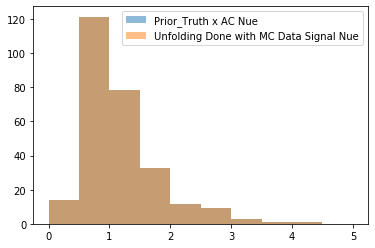

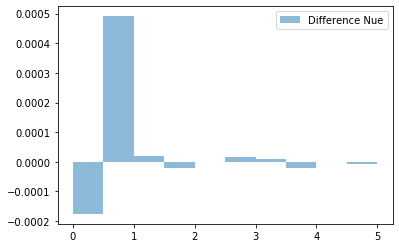

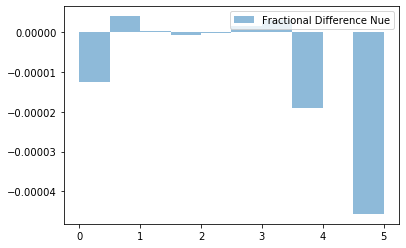

In [17]:
#NUE

import random
import numpy
from matplotlib import pyplot

bins = np.arange(0, 5.5, 0.5)
count = [0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6]
#count = [0.1, 0.6, 1.1, 1.6, 2.1, 2.6]

pyplot.hist(count, bins, weights=made_data_sig_nue, alpha=0.5, label='Prior_Truth x AC Nue')
pyplot.hist(count, bins, weights=events_nue, alpha=0.5, label='Unfolding Done with MC Data Signal Nue')
pyplot.legend(loc='upper right')
pyplot.show()

pyplot.hist(count, bins, weights=diff_nue, alpha=0.5, label='Difference Nue')
pyplot.legend(loc='upper right')
pyplot.show()


pyplot.hist(count, bins, weights=diffasfrac_nue, alpha=0.5, label='Fractional Difference Nue')
pyplot.legend(loc='upper right')
pyplot.show()

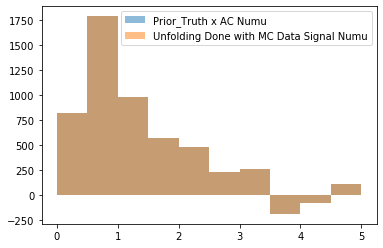

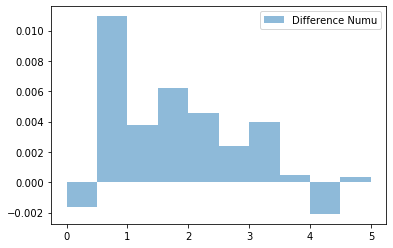

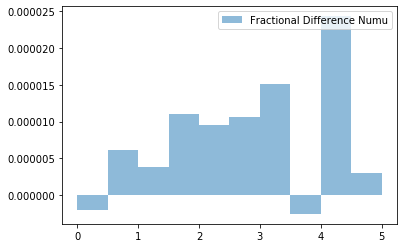

In [18]:
#NUMU

import random
import numpy
from matplotlib import pyplot

bins = np.arange(0, 5.5, 0.5)
count = [0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6]
#count = [0.1, 0.6, 1.1, 1.6, 2.1, 2.6]

pyplot.hist(count, bins, weights=made_data_sig_numu, alpha=0.5, label='Prior_Truth x AC Numu')
pyplot.hist(count, bins, weights=events_numu, alpha=0.5, label='Unfolding Done with MC Data Signal Numu')
pyplot.legend(loc='upper right')
pyplot.show()

pyplot.hist(count, bins, weights=diff_numu, alpha=0.5, label='Difference Numu')
pyplot.legend(loc='upper right')
pyplot.show()


pyplot.hist(count, bins, weights=diffasfrac_numu, alpha=0.5, label='Fractional Difference Numu')
pyplot.legend(loc='upper right')
pyplot.show()

In [17]:
"""
#FIRST 20
diff20 = [0.08709344, 0.70815756, 0.4920871, 0.1285878, 0.13207207, 0.08872457, -0.03538738, 0.02366605, 0.00384698,  0.00310249]
fracdiff20 = [ 1.70225605, 3.03303401, 2.64546074, 2.41259794, 3.45179783, 4.44390654, 11.97415342, 4.69015356, 4.12192291, 6.0374116 ]

#FIRST 50
diff50 = [-0.02566664, -0.57251386, -0.71713231, 1.29042666, -2.0881748, 2.02463519, 1.20301128, -1.12143941, -0.00936788, -0.0184936 ]
fracdiff50 = [ -0.28384884, -0.93284341, -1.69676953,  8.33618287, -27.26366771, 39.20539321, -69.56602203, -48.29563491, -3.1047611, -13.20580659]

#FIRST 80
diff80 = [-0.46890171, 0.02157758, -0.11172548, 0.94767954, -0.95701559, 0.56962462, 1.29848004, -0.73518198, -0.01458795, -0.01744902]
fracdiff80 = [-3.31810814e+00,  2.20115692e-02, -1.54206051e-01, 3.62144051e+00, -7.10738649e+00, 1.04116244e+01, 4.71701136e+01, -3.70343007e+01, -3.14850688e+00, -9.14408546e+00]

#FIRST 100
diff100 = [-0.20654885, 0.10235564, 0.06945382, -0.17804887, -0.39653147, 1.07305231, 0.55832717, -0.82731806, -0.21668303, -0.05513937]
fracdiff100 = [ -1.16643186, 0.08458909, 0.07344725,  -0.56220483, -2.22329967, 13.1292144, 17.98156766, -35.37539865, -20.67769673, -29.18560149]
"""

'\n#FIRST 20\ndiff20 = [0.08709344, 0.70815756, 0.4920871, 0.1285878, 0.13207207, 0.08872457, -0.03538738, 0.02366605, 0.00384698,  0.00310249]\nfracdiff20 = [ 1.70225605, 3.03303401, 2.64546074, 2.41259794, 3.45179783, 4.44390654, 11.97415342, 4.69015356, 4.12192291, 6.0374116 ]\n\n#FIRST 50\ndiff50 = [-0.02566664, -0.57251386, -0.71713231, 1.29042666, -2.0881748, 2.02463519, 1.20301128, -1.12143941, -0.00936788, -0.0184936 ]\nfracdiff50 = [ -0.28384884, -0.93284341, -1.69676953,  8.33618287, -27.26366771, 39.20539321, -69.56602203, -48.29563491, -3.1047611, -13.20580659]\n\n#FIRST 80\ndiff80 = [-0.46890171, 0.02157758, -0.11172548, 0.94767954, -0.95701559, 0.56962462, 1.29848004, -0.73518198, -0.01458795, -0.01744902]\nfracdiff80 = [-3.31810814e+00,  2.20115692e-02, -1.54206051e-01, 3.62144051e+00, -7.10738649e+00, 1.04116244e+01, 4.71701136e+01, -3.70343007e+01, -3.14850688e+00, -9.14408546e+00]\n\n#FIRST 100\ndiff100 = [-0.20654885, 0.10235564, 0.06945382, -0.17804887, -0.39653147,

In [18]:
"""
import random
import numpy
from matplotlib import pyplot

bins = np.arange(0, 5.5, 0.5)
count = [0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6]
#count = [0.1, 0.6, 1.1, 1.6, 2.1, 2.6]

pyplot.hist(count, bins, weights=diff20, color="white", alpha=0.5, label='20%', edgecolor='green')
pyplot.hist(count, bins, weights=diff50, color="white", alpha=0.5, label='50%', edgecolor='blue')
pyplot.hist(count, bins, weights=diff80, color="white", alpha=0.5, label='80%', edgecolor='red')
pyplot.hist(count, bins, weights=diff100, color="white", alpha=0.5, label='100%', edgecolor='purple')
pyplot.legend(loc='upper right')
pyplot.title("Absolute Diff")
pyplot.ylabel("Diff")
pyplot.show()

pyplot.hist(count, bins, weights=fracdiff20, color="green", alpha=0.5, label='20%', edgecolor='green')
pyplot.hist(count, bins, weights=fracdiff50, color="blue", alpha=0.5, label='50%', edgecolor='blue')
pyplot.hist(count, bins, weights=fracdiff80, color="red", alpha=0.5, label='80%', edgecolor='red')
pyplot.hist(count, bins, weights=fracdiff100, color="purple", alpha=0.5, label='100%', edgecolor='purple')
pyplot.legend(loc='upper right')
pyplot.title("Fractional Diff")
pyplot.xlabel("True Nu Energy (GeV)")
pyplot.ylabel("Diff (%)")
pyplot.show()
"""

'\nimport random\nimport numpy\nfrom matplotlib import pyplot\n\nbins = np.arange(0, 5.5, 0.5)\ncount = [0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6]\n#count = [0.1, 0.6, 1.1, 1.6, 2.1, 2.6]\n\npyplot.hist(count, bins, weights=diff20, color="white", alpha=0.5, label=\'20%\', edgecolor=\'green\')\npyplot.hist(count, bins, weights=diff50, color="white", alpha=0.5, label=\'50%\', edgecolor=\'blue\')\npyplot.hist(count, bins, weights=diff80, color="white", alpha=0.5, label=\'80%\', edgecolor=\'red\')\npyplot.hist(count, bins, weights=diff100, color="white", alpha=0.5, label=\'100%\', edgecolor=\'purple\')\npyplot.legend(loc=\'upper right\')\npyplot.title("Absolute Diff")\npyplot.ylabel("Diff")\npyplot.show()\n\npyplot.hist(count, bins, weights=fracdiff20, color="green", alpha=0.5, label=\'20%\', edgecolor=\'green\')\npyplot.hist(count, bins, weights=fracdiff50, color="blue", alpha=0.5, label=\'50%\', edgecolor=\'blue\')\npyplot.hist(count, bins, weights=fracdiff80, color="red", alpha=


Making ratio plot.
count,  [0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6]
bins,  [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
Weights,  [824.007, 1787.54, 984.034, 567.88, 481.384, 226.561, 261.876, -190.405, -85.9334, 113.225]



/tmp/ipykernel_8303/1396007662.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ratio_ax2 = plt.subplot(ratio_gs[0])


Text(0.5, 1.0, 'Unsmeared Plot - Nue Energy Differences')

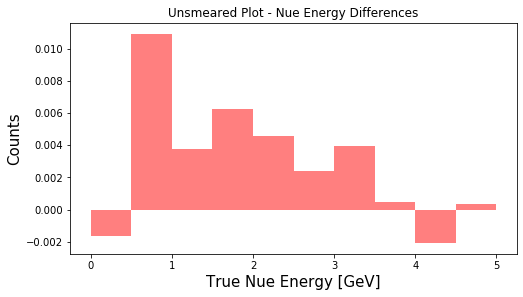

In [7]:
ratio_fig = plt.figure(figsize=(8, 7))
ratio_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
ratio_ax1 = plt.subplot(ratio_gs[0])
ratio_ax2 = plt.subplot(ratio_gs[0])

bins = np.arange(0, 5.5, 0.5)
count = [0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6]
#count = [0.1, 0.6, 1.1, 1.6, 2.1, 2.6]
weights = []
for i in range(len(count)):
    weight = count[i]*events[i]
    weights.append(weight)

print("")
print("Making ratio plot.")
print("count, ", count)
print("bins, ", bins)
print("Weights, ", events)
print("")

#sel = ratio_ax1.hist(count, bins, color='deepskyblue', weights=made_data_sig, alpha=0.8, label='Prior_Truth x AC')
#sel2 = ratio_ax2.hist(count, bins, color='red', weights=events, alpha=0.5, label='Unfolding Done with MC Data Signal')
sel2 = ratio_ax2.hist(count, bins, color='red', weights=diff, alpha=0.5, label='Unfolding Done with MC Data Signal')
ratio_ax1.set_ylabel('Counts', fontsize=15)
ratio_ax1.set_xlabel('True Nue Energy [GeV]', fontsize=15)
ratio_ax1.set_title("Unsmeared Plot - Nue Energy Differences")

In [8]:
bincenters = np.arange(0.25, 3.25, 0.5)
bin_edges = np.arange(0, 3.5, 0.5)
bin_size = [(bin_edges[i + 1] - bin_edges[i]) / 2
            for i in range(len(bin_edges) - 1)]
n_tot = np.array(events)

#ratio_ax1.bar(bincenters, np.array(errs)*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(np.array(events)-np.array(errs)))
ratio_ax1.bar(bincenters, np.array(errs)*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(np.array(diff)-np.array(errs)))
ratio_ax1.set_xlim([0, 3])

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (10,).

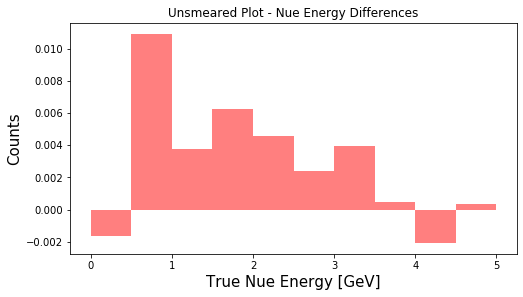

In [9]:
ratio_fig

## Data Tests

In [21]:
with open('../stv-analysis-new/nue_unsmeared_events_energy_MC_ONLY_weighted.csv') as file:
    content = file.readlines()
events = content[0:]
    
for i in range(10):
    events[i]=events[i].rstrip().rstrip(',')
    events[i] = float(events[i])
    
print(events)
print("")
#------------------------------------------------------------------------------
with open('../stv-analysis-new/nue_unsmeared_errors_energy_MC_ONLY_weighted.csv') as file:
    content = file.readlines()
errors = content[0:]
    
for i in range(10):
    errors[i]=errors[i].rstrip().rstrip(',')
    errors[i] = float(errors[i])
    
print(errors)
print("")

[21.378, 140.747, 109.415, 36.0535, 20.9372, 7.6931, 2.65494, 3.81845, 1.59829, 0.322223]

[5.35899, 33.9462, 27.5932, 9.12692, 6.06885, 4.14656, 1.72918, 2.01208, 0.616698, 0.12883]




Making ratio plot.
count,  [0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6]
bins,  [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
Weights,  [21.378, 140.747, 109.415, 36.0535, 20.9372, 7.6931, 2.65494, 3.81845, 1.59829, 0.322223]



Text(0.5, 1.0, 'Unsmeared Plot - Nue Energy')

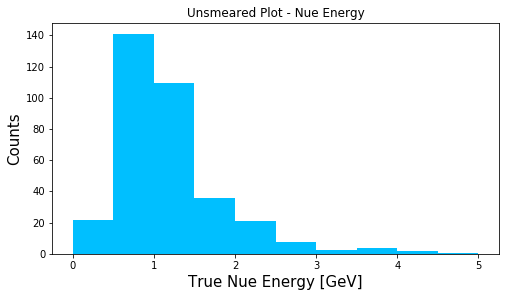

In [22]:
ratio_fig = plt.figure(figsize=(8, 7))
ratio_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
ratio_ax1 = plt.subplot(ratio_gs[0])

bins = np.arange(0, 5.5, 0.5)
count = [0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6]
weights = []
for i in range(len(count)):
    weight = count[i]*events[i]
    weights.append(weight)

print("")
print("Making ratio plot.")
print("count, ", count)
print("bins, ", bins)
print("Weights, ", events)
print("")

sel = ratio_ax1.hist(count, bins, color='deepskyblue', weights=events)
ratio_ax1.set_ylabel('Counts', fontsize=15)
ratio_ax1.set_xlabel('True Nue Energy [GeV]', fontsize=15)
ratio_ax1.set_title("Unsmeared Plot - Nue Energy")

In [23]:
bincenters = np.arange(0.25, 5.25, 0.5)
bin_edges = np.arange(0, 5.5, 0.5)
bin_size = [(bin_edges[i + 1] - bin_edges[i]) / 2
            for i in range(len(bin_edges) - 1)]
n_tot = np.array(events)

ratio_ax1.bar(bincenters, np.array(errors)*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(np.array(events)-np.array(errors)))
ratio_ax1.set_xlim([0, 5])

(0, 5)

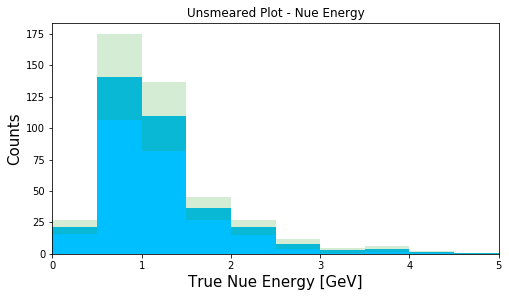

In [24]:
ratio_fig

In [6]:
print(sum(events))

259.52129


## Blockwise Unfolding

In [34]:

with open('../blockwise/stv-analysis-new/blockwise_unsmeared_events_energy_MC_ONLY_weighted_recoCut_incErr_Aug29.csv') as file:
    content = file.readlines()
events = content[0:]
    
for i in range(20):
    events[i]=events[i].rstrip().rstrip(',')
    events[i] = float(events[i])
    
print("Unsmeared events")
print(events)
print("")

#------------------------------------------------------------------------------
with open('../blockwise/stv-analysis-new/blockwise_unsmeared_AC_energy_MC_ONLY_weighted_recoCut_incErr_Aug29.csv') as file:
    content = file.readlines()
AC = content[0:]
    
for i in range(400):
    AC[i]=AC[i].rstrip().rstrip(',')
    AC[i] = float(AC[i])
    

chunks = [AC[x:x+20] for x in range(0, len(AC), 20)]

print("AC")
print(chunks)
print("")
#---------------------------------------------------------------

with open('nue_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_blockwise_recoCut_comb_Aug29.csv') as file:
    content = file.readlines()
prior_true = content[0:]
    
for i in range(20):
    prior_true[i]=prior_true[i].rstrip().rstrip(',')
    prior_true[i] = float(prior_true[i])
    
print("Prior Truth: ")
print(prior_true)
print("")

#----------------------------------------------------------------
with open('../blockwise/stv-analysis-new/blockwise_unsmeared_errors_energy_MC_ONLY_weighted_recoCut_incErr_Aug29.csv') as file:
    content = file.readlines()
errs = content[0:]
    
for i in range(20):
    errs[i]=errs[i].rstrip().rstrip(',')
    errs[i] = float(errs[i])
    
print("Errors: ")
print(errs)
print("")
print("################################################################")
print("")

#----------------------------------------------------------------
with open('../blockwise/stv-analysis-new/blockwise_unsmeared_cov_matrix_energy_MC_ONLY_weighted_recoCut_incErr_Aug29.csv') as file:
    content = file.readlines()
cov = content[0:]
    
for i in range(400):
    cov[i]=cov[i].rstrip().rstrip(',')
    cov[i] = float(cov[i])
    

chunks_cov = [cov[x:x+20] for x in range(0, len(cov), 20)]

print("cov")
print(chunks_cov)
print("")


Unsmeared events
[0.0, -2.58703e-13, 99.7291, 309.313, 202.2, 72.5638, 63.682, 2.99959, 42.2346, 6.14934, 0.0, -8.15007e-13, 1212.89, 2390.93, 320.282, 143.804, 169.947, 436.824, 330.402, 514.408]

AC
[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 4.26325e-31, -8.84329e-17, -4.78724e-16, -3.09379e-16, -1.5662e-16, -7.68377e-17, 5.78088e-17, -1.05212e-16, 5.81511e-19, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, -8.84329e-17, 0.251081, 0.136087, 0.0929336, -0.0370719, 0.0319966, 0.0658339, -0.0916246, 0.0198944, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, -4.78724e-16, 0.136087, 0.684526, 0.228508, 0.0756929, 0.123689, -0.044755, 0.0860978, 0.00839512, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, -3.09379e-16, 0.0929336, 0.228508, 0.447077, 0.142868, -0.0102843, -0.000671217, 0.0710362, 0.00337346, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, -1.5662e-16, -0.0370719, 0.0756929,

In [35]:
with open('../blockwise/stv-analysis-new/blocks.txt') as file:
    content = file.readlines()
blocks = content[0:]

print(blocks)

['20\n', '0  0\n', '1  0\n', '2  0\n', '3  0\n', '4  0\n', '5  0\n', '6  0\n', '7  0\n', '8  0\n', '9  0\n', '10 1\n', '11 1\n', '12 1\n', '13 1\n', '14 1\n', '15 1\n', '16 1\n', '17 1\n', '18 1\n', '19 1\n', '20\n', '0  0\n', '1  0\n', '2  0\n', '3  0\n', '4  0\n', '5  0\n', '6  0\n', '7  0\n', '8  0\n', '9  0\n', '10 1\n', '11 1\n', '12 1\n', '13 1\n', '14 1\n', '15 1\n', '16 1\n', '17 1\n', '18 1\n', '19 1\n']


In [36]:

made_data_sig = np.dot(prior_true, chunks)
print("Prior_Truth x AC: ")
print(made_data_sig)
print("")
print("")
print("Unfolding Done with MC Data Signal: ")
print(events)
print("")

diff = made_data_sig - events
print("")
print("Difference")
print(diff)

#for i in made_data_sig:
#    print(i)

print("")
diffasfrac = np.nan_to_num(diff/made_data_sig)
print(diffasfrac*100)

Prior_Truth x AC: 
[ 0.00000000e+00 -2.58703596e-13  9.97289374e+01  3.09313138e+02
  2.02199994e+02  7.25638031e+01  6.36819082e+01  2.99956640e+00
  4.22345906e+01  6.14933946e+00  0.00000000e+00 -8.15008723e-13
  1.21288868e+03  2.39093428e+03  3.20282571e+02  1.43803718e+02
  1.69947439e+02  4.36824558e+02  3.30402278e+02  5.14406791e+02]


Unfolding Done with MC Data Signal: 
[0.0, -2.58703e-13, 99.7291, 309.313, 202.2, 72.5638, 63.682, 2.99959, 42.2346, 6.14934, 0.0, -8.15007e-13, 1212.89, 2390.93, 320.282, 143.804, 169.947, 436.824, 330.402, 514.408]


Difference
[ 0.00000000e+00 -5.95754078e-19 -1.62602213e-04  1.38249952e-04
 -5.53122211e-06  3.06651545e-06 -9.18041843e-05 -2.36010757e-05
 -9.38026896e-06 -5.36443442e-07  0.00000000e+00 -1.72322836e-18
 -1.31817737e-03  4.28168966e-03  5.71085943e-04 -2.81892292e-04
  4.39481222e-04  5.58180940e-04  2.78065373e-04 -1.20903488e-03]

[ 0.00000000e+00  2.30284421e-04 -1.63044165e-04  4.46957904e-05
 -2.73552041e-06  4.22595746e-0

/tmp/ipykernel_160694/4172135795.py:19: RuntimeWarning: invalid value encountered in true_divide
  diffasfrac = np.nan_to_num(diff/made_data_sig)


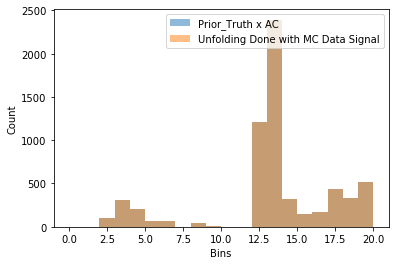

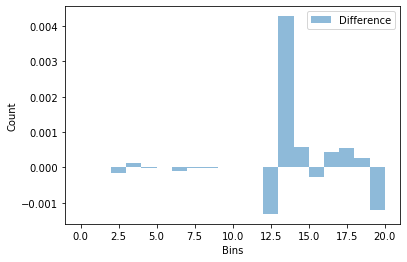

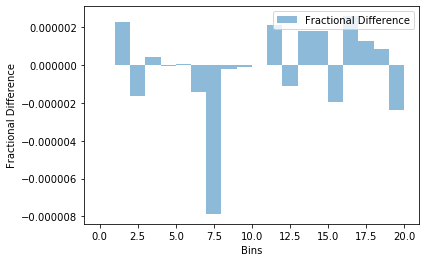

In [37]:
import random
import numpy
from matplotlib import pyplot

bins = np.arange(0, 21, 1)
count = np.arange(0.0, 20.0, 1)

pyplot.hist(count, bins, weights=made_data_sig, alpha=0.5, label='Prior_Truth x AC')
pyplot.hist(count, bins, weights=events, alpha=0.5, label='Unfolding Done with MC Data Signal')
pyplot.legend(loc='upper right')
pyplot.xlabel("Bins")
pyplot.ylabel("Count")
pyplot.show()

pyplot.hist(count, bins, weights=diff, alpha=0.5, label='Difference')
pyplot.legend(loc='upper right')
pyplot.xlabel("Bins")
pyplot.ylabel("Count")
pyplot.show()


pyplot.hist(count, bins, weights=diffasfrac, alpha=0.5, label='Fractional Difference')
pyplot.legend(loc='upper right')
pyplot.xlabel("Bins")
pyplot.ylabel("Fractional Difference")
pyplot.show()

## Need to convert to xsec units

xsec = unfolded event counts / (integrated flux * number of argon targets)

In [38]:
###################
### #N argon target calculation
###################

density = 1.3836  #g/cm^3
volume = (246-10)*(106-(-106))*(1026-10)         #cm^3
NA = 6.022E23   #atoms/mol
Nnuc = 40       #nucleans / atom
mmol = 39.95    #g/mol

Narg = (density * volume * NA * Nnuc)/mmol   #nucleons

print("number of argon targets = ", Narg)

number of argon targets =  4.240685683288815e+31


In [39]:
####NUE
POT = 2.0E20 
int_flux_per_POT = 1.1864531E-11         #from Katrina

int_flux = int_flux_per_POT*POT    #cm^-2

print(int_flux)

####NUMU


POT_numu = 5.014E20 
int_flux_per_POT_numu = 5.388072053227739e-10       

int_flux_numu = int_flux_per_POT_numu*POT_numu    #cm^-2

print(int_flux_numu)

2372906200.0
270157932748.83884


In [40]:
nue_events = np.array(events[0:10])
numu_events = np.array(events[10:20])

nue_errs = np.array(errs[0:10])
numu_errs = np.array(errs[10:20])

In [41]:
#number of events

xsec_nue_events = nue_events / (int_flux * Narg )     #cm^2
xsec_numu_events = numu_events / (int_flux_numu * Narg )     #cm^2


#uncertainty

#xsec_nue_errs = nue_errs / (int_flux * Narg )     #cm^2
#xsec_numu_errs = numu_errs / (int_flux_numu * Narg )     #cm^2

In [67]:
#Need the four sections of the cov matrix

blockwise_errs = chunks_cov
#print(blockwise_errs)
#print("")

#MIX
top_left = blockwise_errs[:10]
for i in range(len(top_left)):
    top_left[i] = top_left[i][:10]
    
mix_errs_top = np.array(top_left)/((int_flux*int_flux_numu)*(Narg*Narg))
xsec_topmix_errs = (np.sqrt(np.diag(mix_errs_top)))
    
#NUMU ONLY    
top_right = blockwise_errs[:10]
for i in range(len(top_right)):
    top_right[i] = top_right[i][10:]
    
numu_errs_top = np.array(top_right)/((int_flux_numu*int_flux_numu)*(Narg*Narg))
xsec_numu_errs = np.nan_to_num(np.sqrt(np.diag(numu_errs_top)))

    
#NUE ONLY
bot_left = blockwise_errs[10:]
for i in range(len(bot_left)):
    bot_left[i] = bot_left[i][:10]
    
nue_errs_bot = np.array(bot_left)/((int_flux*int_flux)*(Narg*Narg))
xsec_nue_errs = np.nan_to_num(np.sqrt(np.diag(nue_errs_bot)))

#MIX
bot_right = blockwise_errs[10:]
for i in range(len(bot_right)):
    bot_right[i] = bot_right[i][10:]
    
mix_errs_bot = np.array(bot_right)/((int_flux*int_flux_numu)*(Narg*Narg))
xsec_botmix_errs = (np.sqrt(np.diag(mix_errs_bot)))


/tmp/ipykernel_160694/3991752781.py:21: RuntimeWarning: invalid value encountered in sqrt
  xsec_numu_errs = np.nan_to_num(np.sqrt(np.diag(numu_errs_top)))
/tmp/ipykernel_160694/3991752781.py:30: RuntimeWarning: invalid value encountered in sqrt
  xsec_nue_errs = np.nan_to_num(np.sqrt(np.diag(nue_errs_bot)))


In [90]:
### Calculate ratio uncertainties

xsec_ratio_events = np.nan_to_num(xsec_nue_events/xsec_numu_events)
print(xsec_ratio_events)

ratio_sq = (xsec_nue_events/xsec_numu_events)*(xsec_nue_events/xsec_numu_events)
nue_term = (xsec_nue_errs*xsec_nue_errs)/(xsec_nue_events*xsec_nue_events)
numu_term = (xsec_numu_errs*xsec_numu_errs)/(xsec_numu_events*xsec_numu_events)
mix_1 = (xsec_botmix_errs*xsec_botmix_errs)/(xsec_numu_events*xsec_nue_events)
mix_2 = (xsec_topmix_errs*xsec_topmix_errs)/(xsec_numu_events*xsec_nue_events)

ratio_var_errs = ratio_sq*(nue_term + numu_term - mix_1 - mix_2)
print(mix_2)
print(ratio_var_errs)
xsec_ratio_errs = np.nan_to_num(np.sqrt(abs(ratio_var_errs)))
print(xsec_ratio_errs)

[ 0.         36.13909556  9.36133178 14.72883731 71.87630995 57.44949356
 42.66191491  0.78179441 14.55334655  1.36099944]
[       nan 0.02801554 0.00709839 0.0117026  0.0578073  0.05486085
 0.03563822 0.08990509 0.03271757 0.00288431]
[           nan -1212.16047706   -97.50006177  -167.35509528
 -4998.737306   -1318.84534435  -866.11725222   -51.38494948
  -578.0764842    -34.62944564]
[ 0.         34.81609509  9.87421196 12.93657974 70.70174896 36.31591035
 29.42987007  7.16832962 24.04322117  5.88467889]


/tmp/ipykernel_160694/1560871734.py:3: RuntimeWarning: invalid value encountered in true_divide
  xsec_ratio_events = np.nan_to_num(xsec_nue_events/xsec_numu_events)
/tmp/ipykernel_160694/1560871734.py:6: RuntimeWarning: invalid value encountered in true_divide
  ratio_sq = (xsec_nue_events/xsec_numu_events)*(xsec_nue_events/xsec_numu_events)
/tmp/ipykernel_160694/1560871734.py:7: RuntimeWarning: invalid value encountered in true_divide
  nue_term = (xsec_nue_errs*xsec_nue_errs)/(xsec_nue_events*xsec_nue_events)
/tmp/ipykernel_160694/1560871734.py:8: RuntimeWarning: invalid value encountered in true_divide
  numu_term = (xsec_numu_errs*xsec_numu_errs)/(xsec_numu_events*xsec_numu_events)
/tmp/ipykernel_160694/1560871734.py:9: RuntimeWarning: invalid value encountered in true_divide
  mix_1 = (xsec_botmix_errs*xsec_botmix_errs)/(xsec_numu_events*xsec_nue_events)
/tmp/ipykernel_160694/1560871734.py:10: RuntimeWarning: invalid value encountered in true_divide
  mix_2 = (xsec_topmix_errs*xs

In [91]:
print(xsec_nue_events)
print("")
print(xsec_numu_events)
print("")
print(xsec_nue_errs)
print("")
print(xsec_numu_errs)

[ 0.00000000e+00 -2.57089778e-54  9.91072087e-40  3.07384184e-39
  2.00939120e-39  7.21113062e-40  6.32848914e-40  2.98088514e-41
  4.19712332e-40  6.11099391e-41]

[ 0.00000000e+00 -7.11389630e-56  1.05868707e-40  2.08695485e-40
  2.79562376e-41  1.25521222e-41  1.48340485e-41  3.81287601e-41
  2.88395752e-41  4.49007821e-41]

[0.00000000e+00 5.28100356e-55 3.63155213e-40 8.96726137e-40
 1.91265920e-40 8.52884189e-41 1.27716292e-40 0.00000000e+00
 2.10039298e-40 1.80046652e-41]

[0.00000000e+00 4.63851865e-57 3.18973886e-42 7.87630771e-42
 1.67996580e-42 7.49122618e-43 1.12178376e-42 0.00000000e+00
 1.84485995e-42 1.58142244e-43]


<BarContainer object of 10 artists>

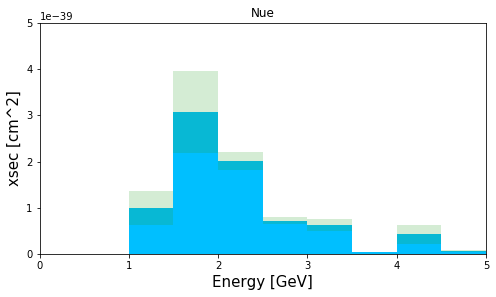

In [92]:
import random
import numpy
from matplotlib import pyplot
"""
bins = np.arange(0, 5.5, 0.5)
count = np.arange(0.1, 5.1, 0.5)
print(count)

plt.ylim(0, 5E-39)

plt.xlabel("Energy [GeV]")
plt.ylabel("xsec [cm^2]")

pyplot.hist(count, bins, weights=xsec_nue_events, alpha=0.5)
#pyplot.legend(loc='upper right')
pyplot.show()
"""

nue_fig = plt.figure(figsize=(8, 7))
nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1 = plt.subplot(nue_gs[0])
nue_ax1.set_xlim([0, 5])

bins = np.arange(0, 5.5, 0.5)
bincenters = np.arange(0.25, 5.25, 0.5)
bin_edges = np.arange(0, 5.5, 0.5)
bin_size = [(bin_edges[i + 1] - bin_edges[i]) / 2
            for i in range(len(bin_edges) - 1)]
count = np.arange(0.1, 5.1, 0.5)
weights = []
for i in range(len(count)):
    weight = count[i]*xsec_nue_events[i]
    weights.append(weight)

sel = nue_ax1.hist(count, bins, color='deepskyblue', weights=xsec_nue_events)
plt.ylim(0, 5E-39)
nue_ax1.set_xlabel('Energy [GeV]', fontsize=15)
nue_ax1.set_ylabel('xsec [cm^2]', fontsize=15)
nue_ax1.set_title("Nue")

lower_err = np.nan_to_num(xsec_nue_events-xsec_nue_errs)

nue_ax1.bar(bincenters, xsec_nue_errs*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(lower_err))

<BarContainer object of 10 artists>

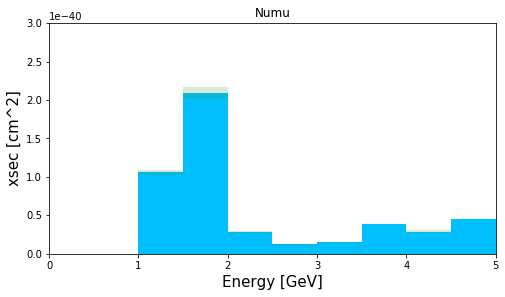

In [93]:
import random
import numpy
from matplotlib import pyplot
"""
bins = np.arange(0, 5.5, 0.5)
count = np.arange(0.1, 5.1, 0.5)
print(count)

plt.ylim(0, 3E-40)

plt.xlabel("Energy [GeV]")
plt.ylabel("xsec [cm^2]")

pyplot.hist(count, bins, weights=xsec_numu_events, alpha=0.5)
#pyplot.legend(loc='upper right')
pyplot.show()
"""


numu_fig = plt.figure(figsize=(8, 7))
numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1 = plt.subplot(numu_gs[0])
numu_ax1.set_xlim([0, 5])

bins = np.arange(0, 5.5, 0.5)
bincenters = np.arange(0.25, 5.25, 0.5)
bin_edges = np.arange(0, 5.5, 0.5)
bin_size = [(bin_edges[i + 1] - bin_edges[i]) / 2
            for i in range(len(bin_edges) - 1)]
count = np.arange(0.1, 5.1, 0.5)
weights = []
for i in range(len(count)):
    weight = count[i]*xsec_numu_events[i]
    weights.append(weight)

sel = numu_ax1.hist(count, bins, color='deepskyblue', weights=xsec_numu_events)
plt.ylim(0, 3E-40)
numu_ax1.set_xlabel('Energy [GeV]', fontsize=15)
numu_ax1.set_ylabel('xsec [cm^2]', fontsize=15)
numu_ax1.set_title("Numu")

lower_err = np.nan_to_num(xsec_numu_events-xsec_numu_errs)

numu_ax1.bar(bincenters, xsec_numu_errs*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(lower_err))

[0.1 0.6 1.1 1.6 2.1 2.6 3.1 3.6 4.1 4.6]
[        nan 36.13909556  9.36133178 14.72883731 71.87630995 57.44949356
 42.66191491  0.78179441 14.55334655  1.36099944]


/tmp/ipykernel_160694/4107659271.py:16: RuntimeWarning: invalid value encountered in true_divide
  print(xsec_nue_events/xsec_numu_events)
/tmp/ipykernel_160694/4107659271.py:18: RuntimeWarning: invalid value encountered in true_divide
  pyplot.hist(count, bins, weights=np.nan_to_num(xsec_nue_events/xsec_numu_events), alpha=0.5)


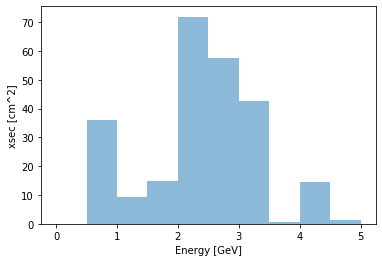

In [94]:
#Think need to replace 2nd bin due to unfolding

import random
import numpy
from matplotlib import pyplot

bins = np.arange(0, 5.5, 0.5)
count = np.arange(0.1, 5.1, 0.5)
print(count)

#plt.ylim(0, 3E-40)

plt.xlabel("Energy [GeV]")
plt.ylabel("xsec [cm^2]")

print(xsec_nue_events/xsec_numu_events)

pyplot.hist(count, bins, weights=np.nan_to_num(xsec_nue_events/xsec_numu_events), alpha=0.5)
#pyplot.legend(loc='upper right')
pyplot.show()

(array([ 0.        , 36.13909556,  9.36133178, 14.72883731, 71.87630995,
       57.44949356, 42.66191491,  0.78179441, 14.55334655,  1.36099944]), array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]), <a list of 10 Patch objects>)


<BarContainer object of 10 artists>

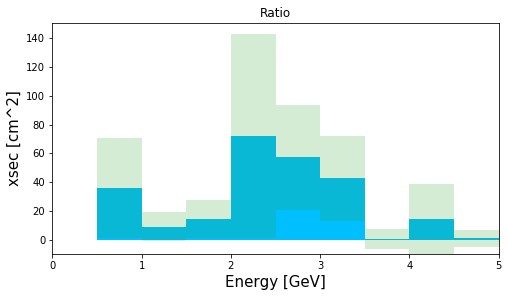

In [95]:
import random
import numpy
from matplotlib import pyplot
"""
bins = np.arange(0, 5.5, 0.5)
count = np.arange(0.1, 5.1, 0.5)
print(count)

plt.ylim(0, 3E-40)

plt.xlabel("Energy [GeV]")
plt.ylabel("xsec [cm^2]")

pyplot.hist(count, bins, weights=xsec_numu_events, alpha=0.5)
#pyplot.legend(loc='upper right')
pyplot.show()
"""


ratio_fig = plt.figure(figsize=(8, 7))
ratio_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
ratio_ax1 = plt.subplot(ratio_gs[0])
ratio_ax1.set_xlim([0, 5])

bins = np.arange(0, 5.5, 0.5)
bincenters = np.arange(0.25, 5.25, 0.5)
bin_edges = np.arange(0, 5.5, 0.5)
bin_size = [(bin_edges[i + 1] - bin_edges[i]) / 2
            for i in range(len(bin_edges) - 1)]
count = np.arange(0.1, 5.1, 0.5)
weights = []
for i in range(len(count)):
    weight = count[i]*xsec_ratio_events[i]
    weights.append(weight)

sel = ratio_ax1.hist(count, bins, color='deepskyblue', weights=xsec_ratio_events)
print(sel)
#plt.ylim(0, 3E-40)
ratio_ax1.set_xlabel('Energy [GeV]', fontsize=15)
ratio_ax1.set_ylabel('xsec [cm^2]', fontsize=15)
ratio_ax1.set_title("Ratio")

lower_err = np.nan_to_num(xsec_ratio_events-xsec_ratio_errs)

ratio_ax1.bar(bincenters, xsec_ratio_errs*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(lower_err))